# Problem 2 House dataset

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/Bhupesh/Desktop/bond/ST/CCMT/etc/sem4/Python/Machine learning/08-Linear-Regression-Models/ME698-main/housing.csv')
df = pd.DataFrame(data)
X = df.drop('N', axis=1)
X.insert(0, 'Intercept', 1)
Y = df['N']
X

,Intercept,A,B,C,D,E,F,G,H,I,J,K,L,M
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,1,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,1,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,1,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [29]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(X)
X=scalar.transform(X)
#Y=scalar.transform(Y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.10, random_state=1) 
X_train

array([[0.00000000e+00, 1.08553591e-03, 3.00000000e-01, ...,
        4.25531915e-01, 9.39104342e-01, 2.61865342e-01],
       [0.00000000e+00, 2.64471527e-04, 0.00000000e+00, ...,
        6.48936170e-01, 9.92990065e-01, 9.60264901e-02],
       [0.00000000e+00, 2.57849061e-02, 0.00000000e+00, ...,
        2.23404255e-01, 7.48323163e-01, 2.58554084e-01],
       ...,
       [0.00000000e+00, 6.59293909e-02, 0.00000000e+00, ...,
        8.08510638e-01, 1.00000000e+00, 4.86754967e-01],
       [0.00000000e+00, 3.64314305e-03, 0.00000000e+00, ...,
        5.10638298e-01, 9.49190579e-01, 2.52483444e-01],
       [0.00000000e+00, 8.29719002e-04, 0.00000000e+00, ...,
        7.02127660e-01, 1.00000000e+00, 1.94260486e-01]])

In [31]:
class Linear_Regression():

    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self,X,Y):
        self.m, self.n = X.shape

        self.w = np.zeros(self.n)
        self.X = X
        self.Y = Y

        for i in range(self.iterations):
            self.update_weights()

    def update_weights(self,):

        Y_prediction = self.predict(self.X)

        dw = (-2*(self.X.T).dot(self.Y-Y_prediction))/self.m
        
        self.w = self.w - self.learning_rate*dw

    def predict(self,X):

        return X.dot(self.w)


In [34]:
from sklearn.metrics import mean_absolute_error

In [36]:
ALL_MAE=[]
LEARNING_RATE=[]
ALL_Learning_rate = list(np.arange(.01,.2,.02))

for m in range(len(ALL_Learning_rate)):
    model=Linear_Regression(learning_rate=ALL_Learning_rate[m],iterations=1000)
    model.fit(X_train,y_train)
    Y_test_predict = model.predict(X_test)
    MAE = mean_absolute_error(y_test, Y_test_predict)
    print(f'Mean Absolute Error is {MAE} and learning rate is {model.learning_rate} ')

    ALL_MAE.append(MAE)
    LEARNING_RATE.append(model.learning_rate)

Mean Absolute Error is 4.631340361645038 and learning rate is 0.01 
Mean Absolute Error is 3.987746882310703 and learning rate is 0.03 
Mean Absolute Error is 3.833255383413213 and learning rate is 0.049999999999999996 
Mean Absolute Error is 3.7846818615603888 and learning rate is 0.06999999999999999 
Mean Absolute Error is 3.769291994973667 and learning rate is 0.08999999999999998 
Mean Absolute Error is 3.765835612228569 and learning rate is 0.10999999999999997 
Mean Absolute Error is 3.7710833091428175 and learning rate is 0.12999999999999998 
Mean Absolute Error is 3.7775218522033644 and learning rate is 0.15 
Mean Absolute Error is 3.7837029993808793 and learning rate is 0.16999999999999998 
Mean Absolute Error is 3.7889520515890878 and learning rate is 0.18999999999999997 


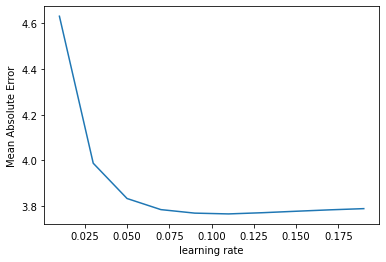

In [37]:
plt.plot(LEARNING_RATE, ALL_MAE)
plt.xlabel("learning rate")
plt.ylabel("Mean Absolute Error")
plt.show()

In [40]:
model=Linear_Regression(learning_rate=0.11,iterations=1000)
model.fit(X_train,y_train)
Y_test_predict = model.predict(X_test)
model.w

array([  0.        ,  -5.53675852,   4.62425751,   2.89826013,
         2.70249518,  -2.44986017,  34.8657312 ,   2.60681258,
        -3.17708895,   4.97414188,  -5.04917628,  -3.97566347,
        10.03017543, -12.82437695])

In [41]:
MAE = mean_absolute_error(y_test, Y_test_predict)
print(f'Mean Absolute Error is {MAE} and learning rate is {model.learning_rate} ')

Mean Absolute Error is 3.76583561222857 and learning rate is 0.11 


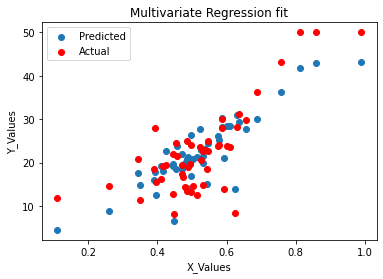

In [48]:
plt.scatter(X_test[:,6], Y_test_predict,label='Predicted')
plt.scatter(X_test[:,6], y_test, color='red',label='Actual')
plt.title('Multivariate Regression fit')
plt.ylabel('Y_Values')
plt.xlabel('X_Values')
plt.legend()
plt.show()

# Linear regression with Gaussian Basis function

In [76]:
mu = X.mean(axis=0)
mu = [mu[6],mu[12],mu[13]]
X_poly = [df['F'],df['L'],df['M']]
X_poly = pd.DataFrame(X_poly).T
X_poly

,F,L,M
0,6.575,396.90,4.98
1,6.421,396.90,9.14
2,7.185,392.83,4.03
3,6.998,394.63,2.94
4,7.147,396.90,5.33
...,...,...,...
501,6.593,391.99,9.67
502,6.120,396.90,9.08
503,6.976,396.90,5.64
504,6.794,393.45,6.48


In [79]:
scalar=MinMaxScaler()
scalar.fit(X_poly)
X_poly=scalar.transform(X_poly)
X_poly

array([[0.57750527, 1.        , 0.08967991],
       [0.5479977 , 1.        , 0.2044702 ],
       [0.6943859 , 0.98973725, 0.06346578],
       ...,
       [0.65433991, 1.        , 0.10789183],
       [0.61946733, 0.99130062, 0.13107064],
       [0.47307913, 1.        , 0.16970199]])

In [88]:
def gaussian_basis(x, mu, sigma=.1):
        return np.exp(-((mu-x)**2)/sigma**2)
phi_X=[]
all_phi_X=[]
    
for i in range(len(mu)):
    Phi_X = gaussian_basis(X_poly[:,i],mu[i],sigma=.2)
    
    #all_phi_X.append([Phi_X]) 
    all_phi_X.insert(i,Phi_X)
all_phi_X = pd.DataFrame(all_phi_X).T
all_phi_X

,0,1,2
0,0.925534,0.773204,0.326042
1,0.983077,0.773204,0.790627
2,0.475185,0.812372,0.242822
3,0.626831,0.795327,0.165982
4,0.505316,0.773204,0.360299
...,...,...,...
501,0.916424,0.820162,0.844179
502,0.975429,0.773204,0.784255
503,0.644866,0.773204,0.392106
504,0.788096,0.806554,0.484141


In [89]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train, y_test = train_test_split(all_phi_X, Y, test_size=0.1,random_state=1)

In [90]:
w = np.linalg.inv(X_train_2.T @ X_train_2) @ X_train_2.T @ y_train
w

0    -0.397885
1    26.902228
2     2.232465
dtype: float64

In [91]:
def predict(w,X):
    return X.dot(w)

Y_test_predict = predict(w,X_test_2)

In [92]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, Y_test_predict)
print(f'Mean Absolute Error is {MAE} ')

Mean Absolute Error is 7.920270661276855 


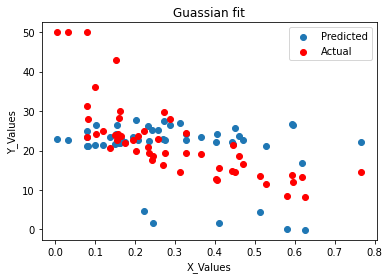

In [99]:
plt.scatter(X_test[:,13], Y_test_predict,label='Predicted')
plt.scatter(X_test[:,13], y_test, color='red',label='Actual')
plt.title('Guassian fit')
plt.ylabel('Y_Values')
plt.xlabel('X_Values')
plt.legend()
plt.show()